# Tutorial 3 - Boosting Search via Symmetry Breaking, Implied Constraints, Randomisation, and Restarts 
revisit the exact parameters so that restars work) 

**Please do not read untill you fully finish the first 2 tutorials**

Congratulations! you are now level one constraint programmer: you know the basics on how to model a problem, how to display solutions, how to evaluate models, and how to choose a good branching strategy !! **I'm so proud of you!**

In this tutorial we slowly dive into advanced techniques. We also start to use arithmetic constraints and solve optimisation problems.

In [3]:
from config import setup
setup()

## Golomb ruler

Your goal is to place $N$ marks on a ruler, such that no two marks are at the same distance and the total length of the ruler (the position of the last mark) is minimized. 

<div class="row" style="margin-top: 10px">
    <img src="display/images/Golomb_Ruler-4.svg" style="display: block; margin: auto; width: 400px;" />
    <p style="margin: auto; margin-top: 10px; text-align: center;">Golomb ruler of order 4 and length 6. This ruler is both optimal and perfect.</p>
</div>

Golomb ruler can be used in information theory to design error correcting codes or in telecommunications to avoid interferences during radio communications. You can read about it here https://en.wikipedia.org/wiki/Golomb_ruler#:~:targetText=In%20mathematics%2C%20a%20Golomb%20ruler,are%20the%20same%20distance%20apart.&targetText=It%20has%20been%20proven%20that,of%20the%20same%20order%20exists.


**In the rest of this tutorial (except the last part), please use the following parameter with the solve method:**

```
SearchType= 'DepthFirst'
```

Also, in order to control the level of filtering (arc consistency, bound consistency, forward checking, etc), CPoptimizer offers to use a parameter called $DefaultInferenceLevel$  http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.parameters.py.html?highlight=defaultinferencelevel#docplex.cp.parameters.CpoParameters.DefaultInferenceLevel

In the rest of this tutorial, you are required to test all three possibilities


```
DefaultInferenceLevel=Low
DefaultInferenceLevel=Medium
DefaultInferenceLevel=Extended

```

After a while, if you see one that you particularly find efficient (runtime), you can use it for the rest of the tutorial. 


Create a model for the decision version of this problem. That is, given $n$ marks, and a ruler of size $m$, place the $n$ markers such that no two markers are at the same distance. 

You are free to use any constraint you want. However, you must declare and use the minimum amount of constraints (**NOT A SINGLE UNNESSASARY CONSTRAINT**)

Note that for N marks, a ruler of length $2 ^ {N -1}$ can be found (I let you figure out why). Pour $2 ^ {N -1}=m$ on sait que l'on aura une solution.

Write a funtion decision_model(n,m) that builds and returns the correspondant model. 

In [66]:
from docplex.cp.model import *
from docplex.cp.config import get_default

def decision_model(n,m):
    
    model = CpoModel(name='golomb_ruler')
    x= model.integer_var_list(n, 0, m, 'x')
    
    model.add(x[0]==0)
    model.add(x[-1]==m)
    
    var = []
    
    for i in range(n):
        if i!=(n-1) :
            model.add(x[i]<=x[i+1])
        for j in range(i+1,n):
            var.append(x[j]-x[i])
            
    model.add(all_diff(var))
    print(2**(n-1))
    return model

In [18]:
model = decision_model(4,6)
solved_m = model.solve()
solved_m = model.solve(SearchType= 'DepthFirst')
values = [solved_m.get_value(f'x_{i}') for i in range(4)]
print(values)

8
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  3 != x_1
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 3
 ! Number of fails        : 1
 ! Total memory usage     : 541.7 kB (502.0 kB CP Optimizer + 39.7 kB Concert)
 ! Time spen

Solve the problem for n=4, m=6. Then try different values of (n,m) (but don't waste too much time). 

In [21]:
model = decision_model(5,6)
solved_m = model.solve()
values = [solved_m.get_value(f'x_{i}') for i in range(5)]
print(values)

model = decision_model(5,16)
solved_m = model.solve()
values = [solved_m.get_value(f'x_{i}') for i in range(5)]
print(values)

16
/tmp/ipykernel_7382/2727317413.py:18(stream:24:1): Warning: The constraint is always false, the model is infeasible.
                                                              allDiff([abs(x_1 - x_0), abs(x_2 - x_0), abs(x_3 - x_0), abs(x_4 - x_0), abs(x_2 - x_1), abs(x_3 - x_1), abs(x_4 - x_1), abs(x_3 - x_2), abs(x_4 - x_2), abs(x_4 - x_3)])
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 5 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 14.0 (before), 14.0 (after)
 !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! --------------------------------------------------------

You can display to solution using  :  

```
from display import golomb as display_golomb
display_golomb([sol[m] for m in marks])
```

In [29]:
from display import golomb as display_golomb
%matplotlib inline

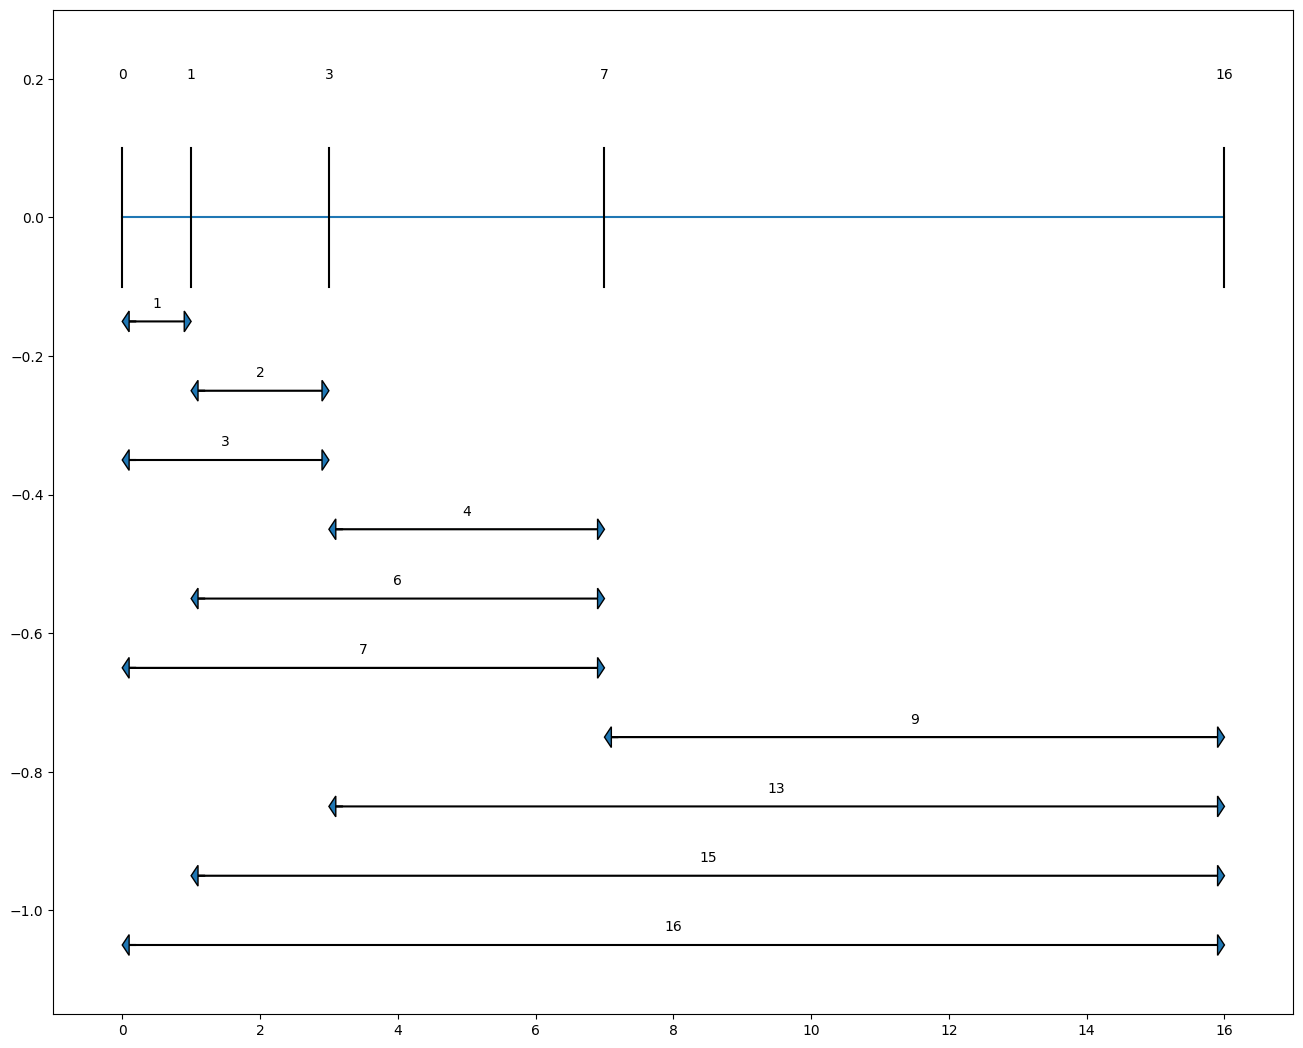

In [30]:
values = [solved_m.get_value(f'x_{i}') for i in range(5)]
display_golomb(values)

Print and display all the sulutions for (n,m) = (4,6) and (4,7)

8
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 11.2 (before), 11.2 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      3  0.00s                  3 != x_1
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 3
 ! Number of fails        : 1
 ! Total memory usage     : 541.7 kB (502.0 kB CP Optimizer + 39.7 kB Concert)
 ! Time spen

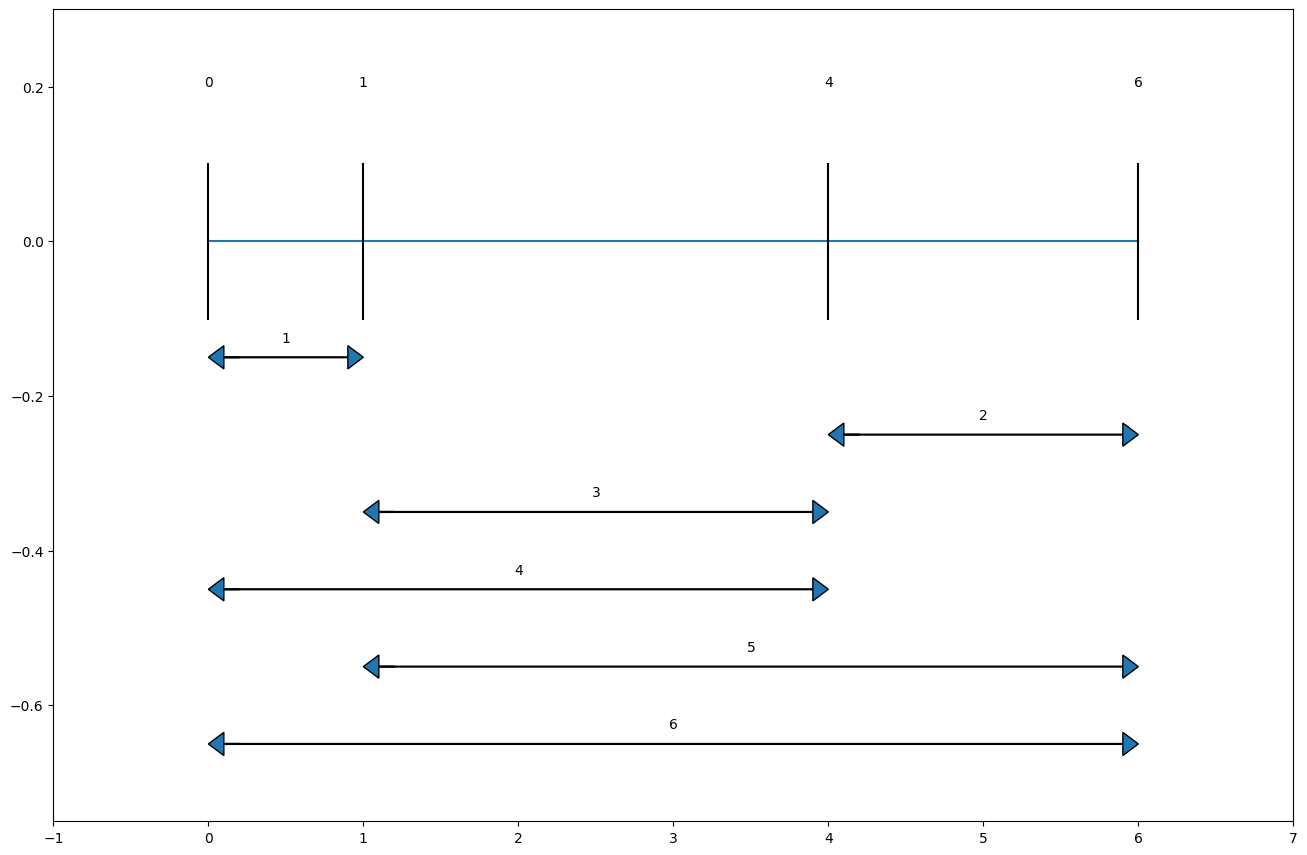

In [31]:
model = decision_model(4,6)
solved_m = model.solve()
values = [solved_m.get_value(f'x_{i}') for i in range(4)]
display_golomb(values)

8
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 12.0 (before), 12.0 (after)
 !  . Memory usage      : 298.9 kB (before), 298.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.00s                  3  = x_1
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 2
 ! Number of fails        : 0
 ! Total memory usage     : 541.7 kB (502.0 kB CP Optimizer + 39.7 kB Concert)
 ! Time spen

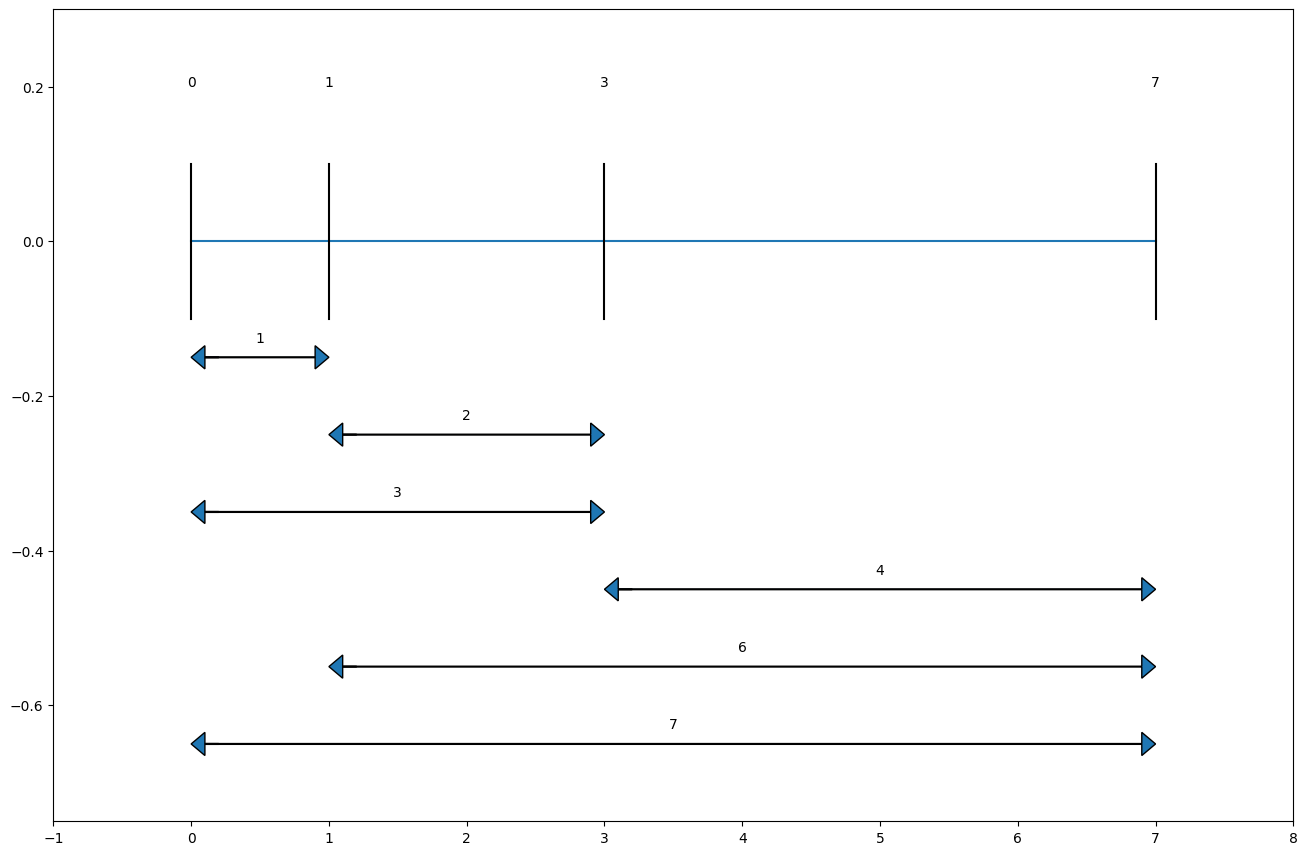

In [33]:
model = decision_model(4,7)
solved_m = model.solve()
values = [solved_m.get_value(f'x_{i}') for i in range(4)]
display_golomb(values)

Write a funtion  basic_optimisation_model(n) that builds and returns the correspondant model for the
optimisation problem. Note that an optimisation function can be seen as a variable. In order to specify the variable to optimise, we can simply use : 

```
model.add(model.minimize(myvariable))
```

or 

```
model.add(model.maximize(myvariable))
```


In [59]:
def basic_optimisation_model(n):
    model = CpoModel(name='golomb_ruler')
    m= model.integer_var(0, 2**(n-1))
    x= model.integer_var_list(n, 0, 2**(n-1), 'x')
    
    model.add(x[0]==0)
    model.add(x[-1]==m)
    
    var = []
    
    for i in range(n):
        if i!=(n-1) :
            model.add(x[i]<=x[i+1])
        
        for j in range(i+1,n):
            
            var.append(x[j]-x[i])
            
    model.add(all_diff(var))
    model.add(model.minimize(m))
    return model
    

Solve the optimisation problem for N=6.. 10  and display the solution

 ! ----------------------------------------------------------------------------
 ! Minimization problem - 7 variables, 8 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 35.3 (before), 35.3 (after)
 !  . Memory usage      : 299.4 kB (before), 299.4 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          7                 -
 + New bound is 0
                     1000          2        F     7  = x_2
 *            17     1228  0.01s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 17 (optimal - effective tol. is 0)
 ! Best bound             : 0
 ! ---

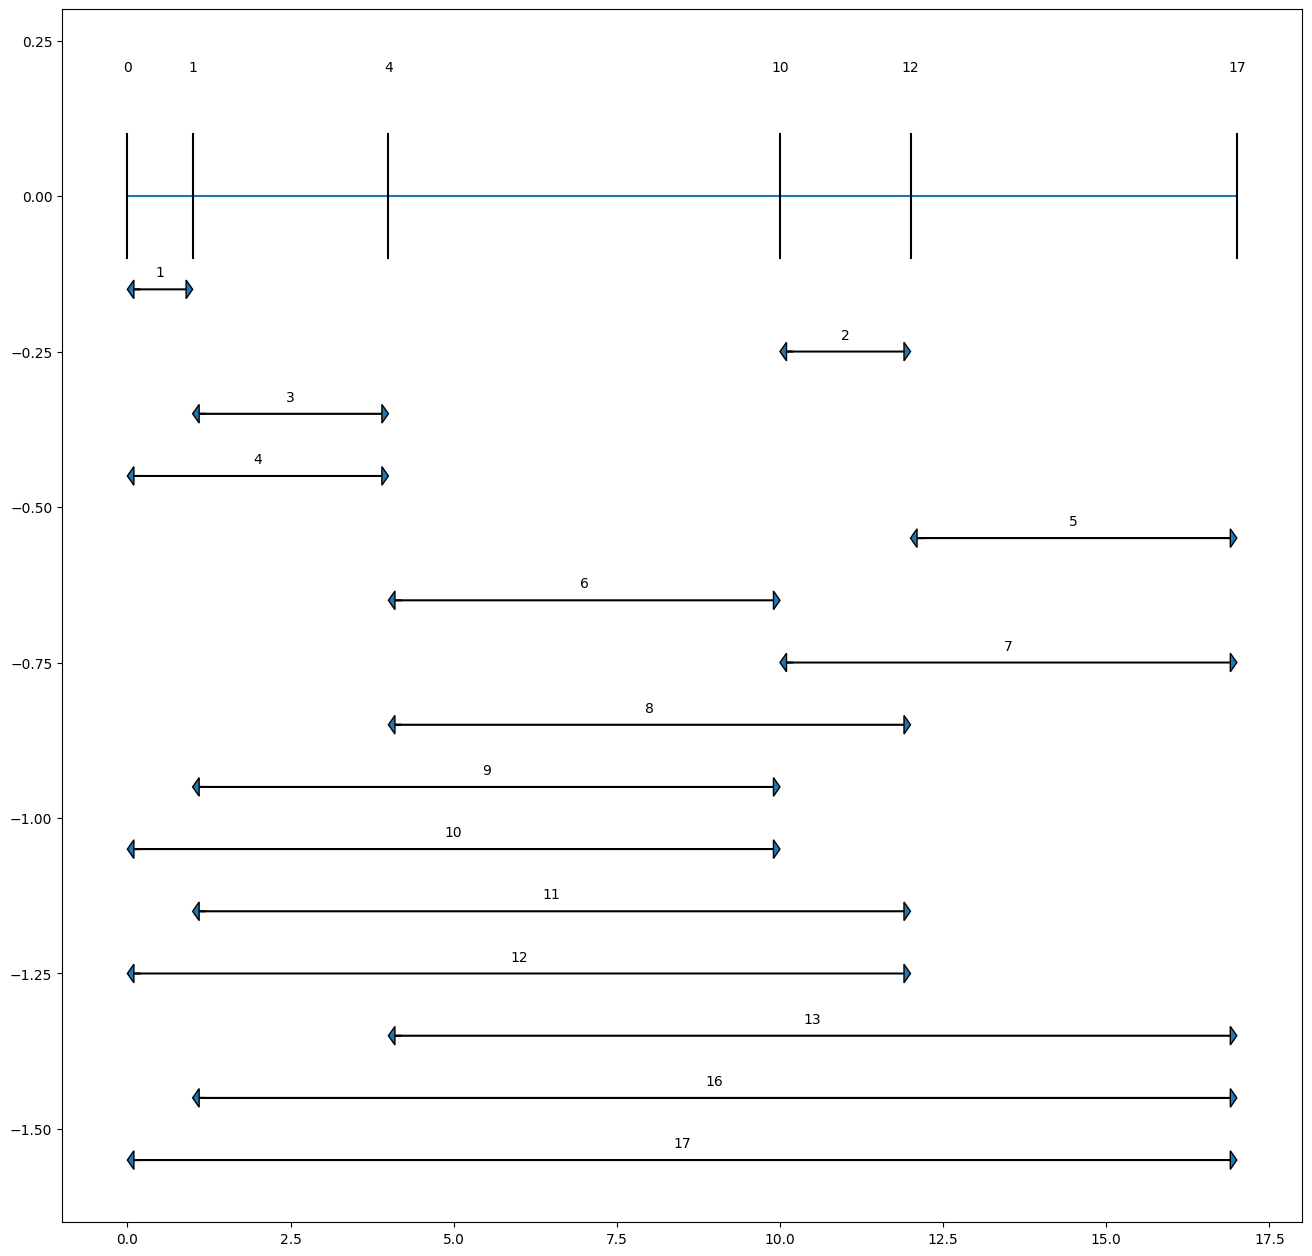

 ! ----------------------------------------------------------------------------
 ! Minimization problem - 8 variables, 9 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 48.2 (before), 48.2 (after)
 !  . Memory usage      : 299.5 kB (before), 299.5 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          8                 -
 + New bound is 0
                     1000          3              3 != x_3
                     2000          2              6 != x_4
                     3000          2        F     5 != x_3
                     4000          2             12 != x_3
                     5000          2              3 != x_4
                     6000          2         

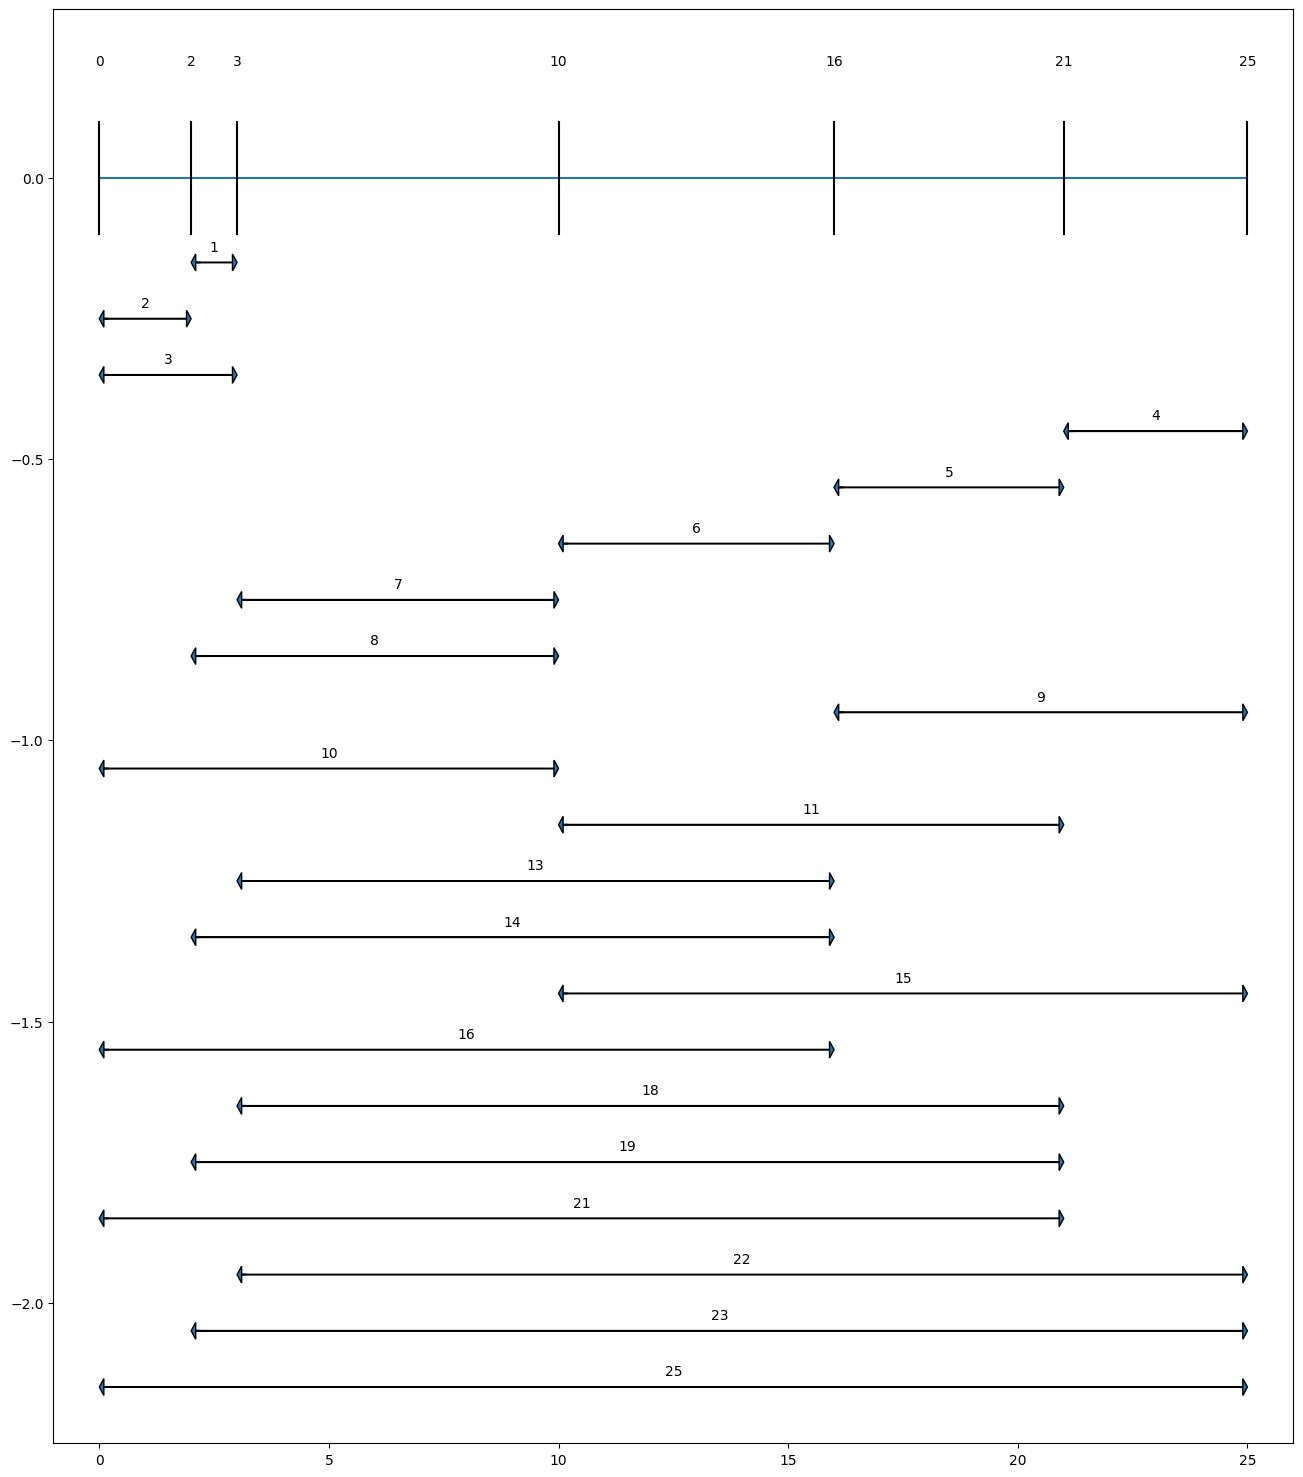

 ! ----------------------------------------------------------------------------
 ! Minimization problem - 9 variables, 10 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 63.1 (before), 63.1 (after)
 !  . Memory usage      : 299.6 kB (before), 299.6 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0          9                 -
 + New bound is 0
                     1000          4        F     4 != x_3
                     2000          3              6 != x_5
                     3000          3        F     4  = x_4
                     4000          3        F     6  = x_4
                     5000          3        F     5  = x_4
                     6000          3        

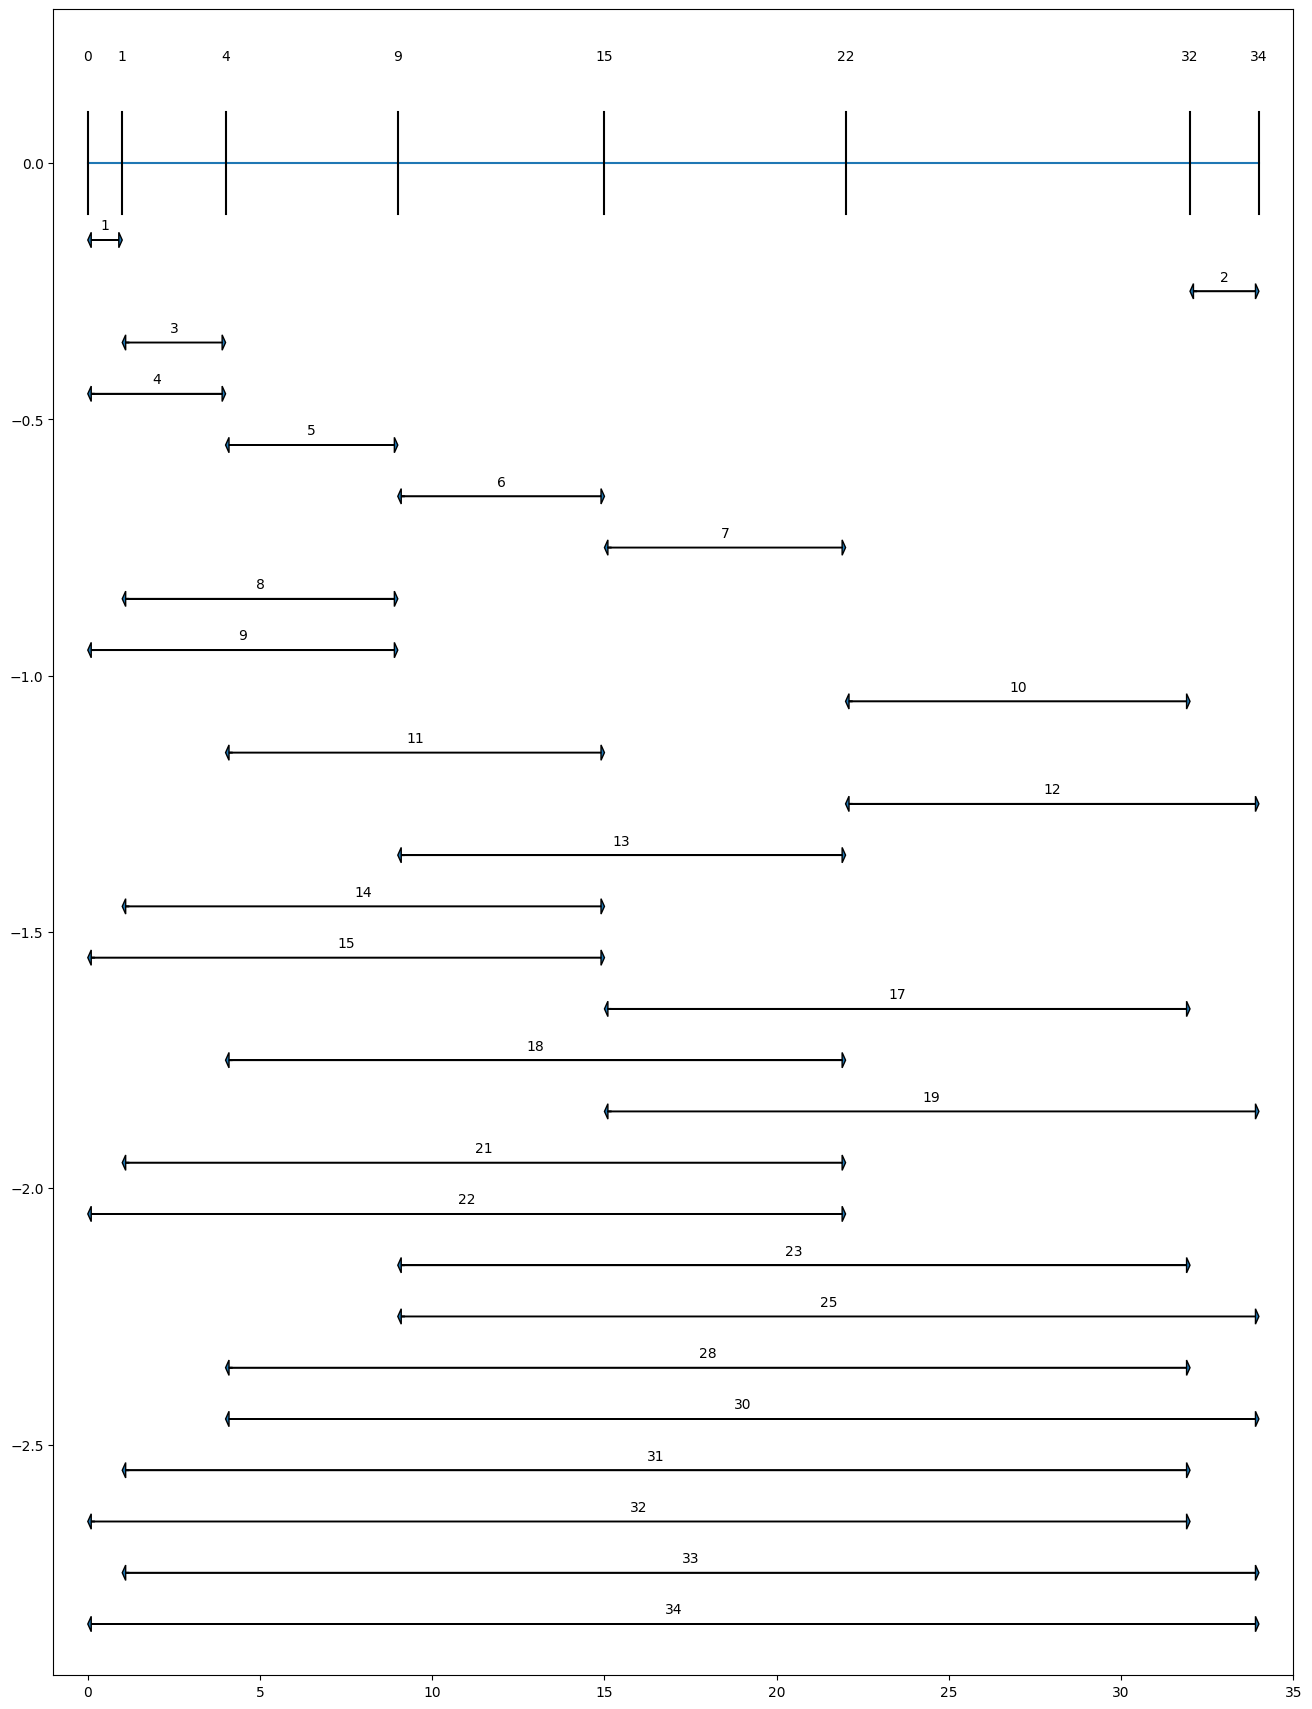

 ! ----------------------------------------------------------------------------
 ! Minimization problem - 10 variables, 11 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 80.1 (before), 80.1 (after)
 !  . Memory usage      : 299.7 kB (before), 299.7 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0         10                 -
 + New bound is 0
                     1000          5        F     5 != x_5
                     2000          4        F     2  = x_4
                     3000          4              4  = x_7
                     4000          4              5 != x_6
                     5000          4              6  = x_6
                     6000          4       

                     116k          3              4 != x_3
                     117k          3             19  = x_6
                     118k          3        F    14  = x_5
                     119k          3             12  = x_6
 ! Time = 0.46s, Average fail depth = 5, Memory usage = 630.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     120k          3        F    17 != x_4
                     121k          2             26 != x_7
                     122k          2        F     5  = x_3
                     123k          4        F     8 != x_2
                     124k          3        F    11  = x_4
                     125k          3             10 != x_3
                     126k          3              8 != x_4
                     127k          3        F     7  = x_4
                     128k          3             16  = x_4
                     129k          3             19 != x_4
                     13

 ! Time = 1.00s, Average fail depth = 5, Memory usage = 630.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     240k          2             28 != x_6
                     241k          2        F     2  = x_3
                     242k          3        F     7  = x_4
                     243k          3              6  = x_4
                     244k          3        F    10  = x_4
                     245k          2        F     4  = x_1
                     246k          2              4 != x_4
                     247k          3        F     7  = x_3
                     248k          3        F     3  = x_5
                     249k          3        F     3  = x_1
                     250k          3              9  = x_5
                     251k          3             13 != x_4
                     252k          2        F     8 != x_1
                     253k          2        F    14 != x_4
                     25

                     361k          3        F     5  = x_3
                     362k          3        F     3 != x_2
                     363k          2        F    18 != x_3
                     364k          3        F     2  = x_3
                     365k          2             15  = x_4
                     366k          3        F     8  = x_2
                     367k          2        F     6 != x_3
                     368k          3              7 != x_3
                     369k          3              7 != x_4
                     370k          2             15 != x_4
                     371k          2              4 != x_3
                     372k          2        F     2  = x_1
                     373k          2        F     8  = x_3
                     374k          2        F     5  = x_1
                     375k          3             13 != x_4
                     376k          3              8  = x_4
                     377k          2             20 != x

                     485k          3        F     4  = x_5
                     486k          3        F    14 != x_4
                     487k          3              6 != x_4
                     488k          3        F    10 != x_2
                     489k          3        F     3 != x_3
                     490k          3              3  = x_4
                     491k          3             16 != x_4
                     492k          2              3 != x_4
                     493k          3             14 != x_6
                     494k          2        F     1  = x_2
                     495k          2              4 != x_3
                     496k          3              5 != x_3
                     497k          3        F     4  = x_2
                     498k          3              7 != x_4
                     499k          2        F    15  = x_4
 ! Time = 2.05s, Average fail depth = 5, Memory usage = 630.0 kB
 ! Current bound is 0
 !          Best Branches  N

                     609k          2        F     7  = x_4
                     610k          2        F    15 != x_5
                     611k          2        F    22  = x_5
                     612k          2             11  = x_4
                     613k          2             15 != x_5
                     614k          2        F    22 != x_4
                     615k          2             11 != x_5
                     616k          2             15  = x_6
                     617k          2        F    21  = x_4
                     618k          2             26  = x_5
                     619k          2             25 != x_5
 ! Time = 2.60s, Average fail depth = 6, Memory usage = 630.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
 *            44     619k  2.60s               (gap is 100.0%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective 

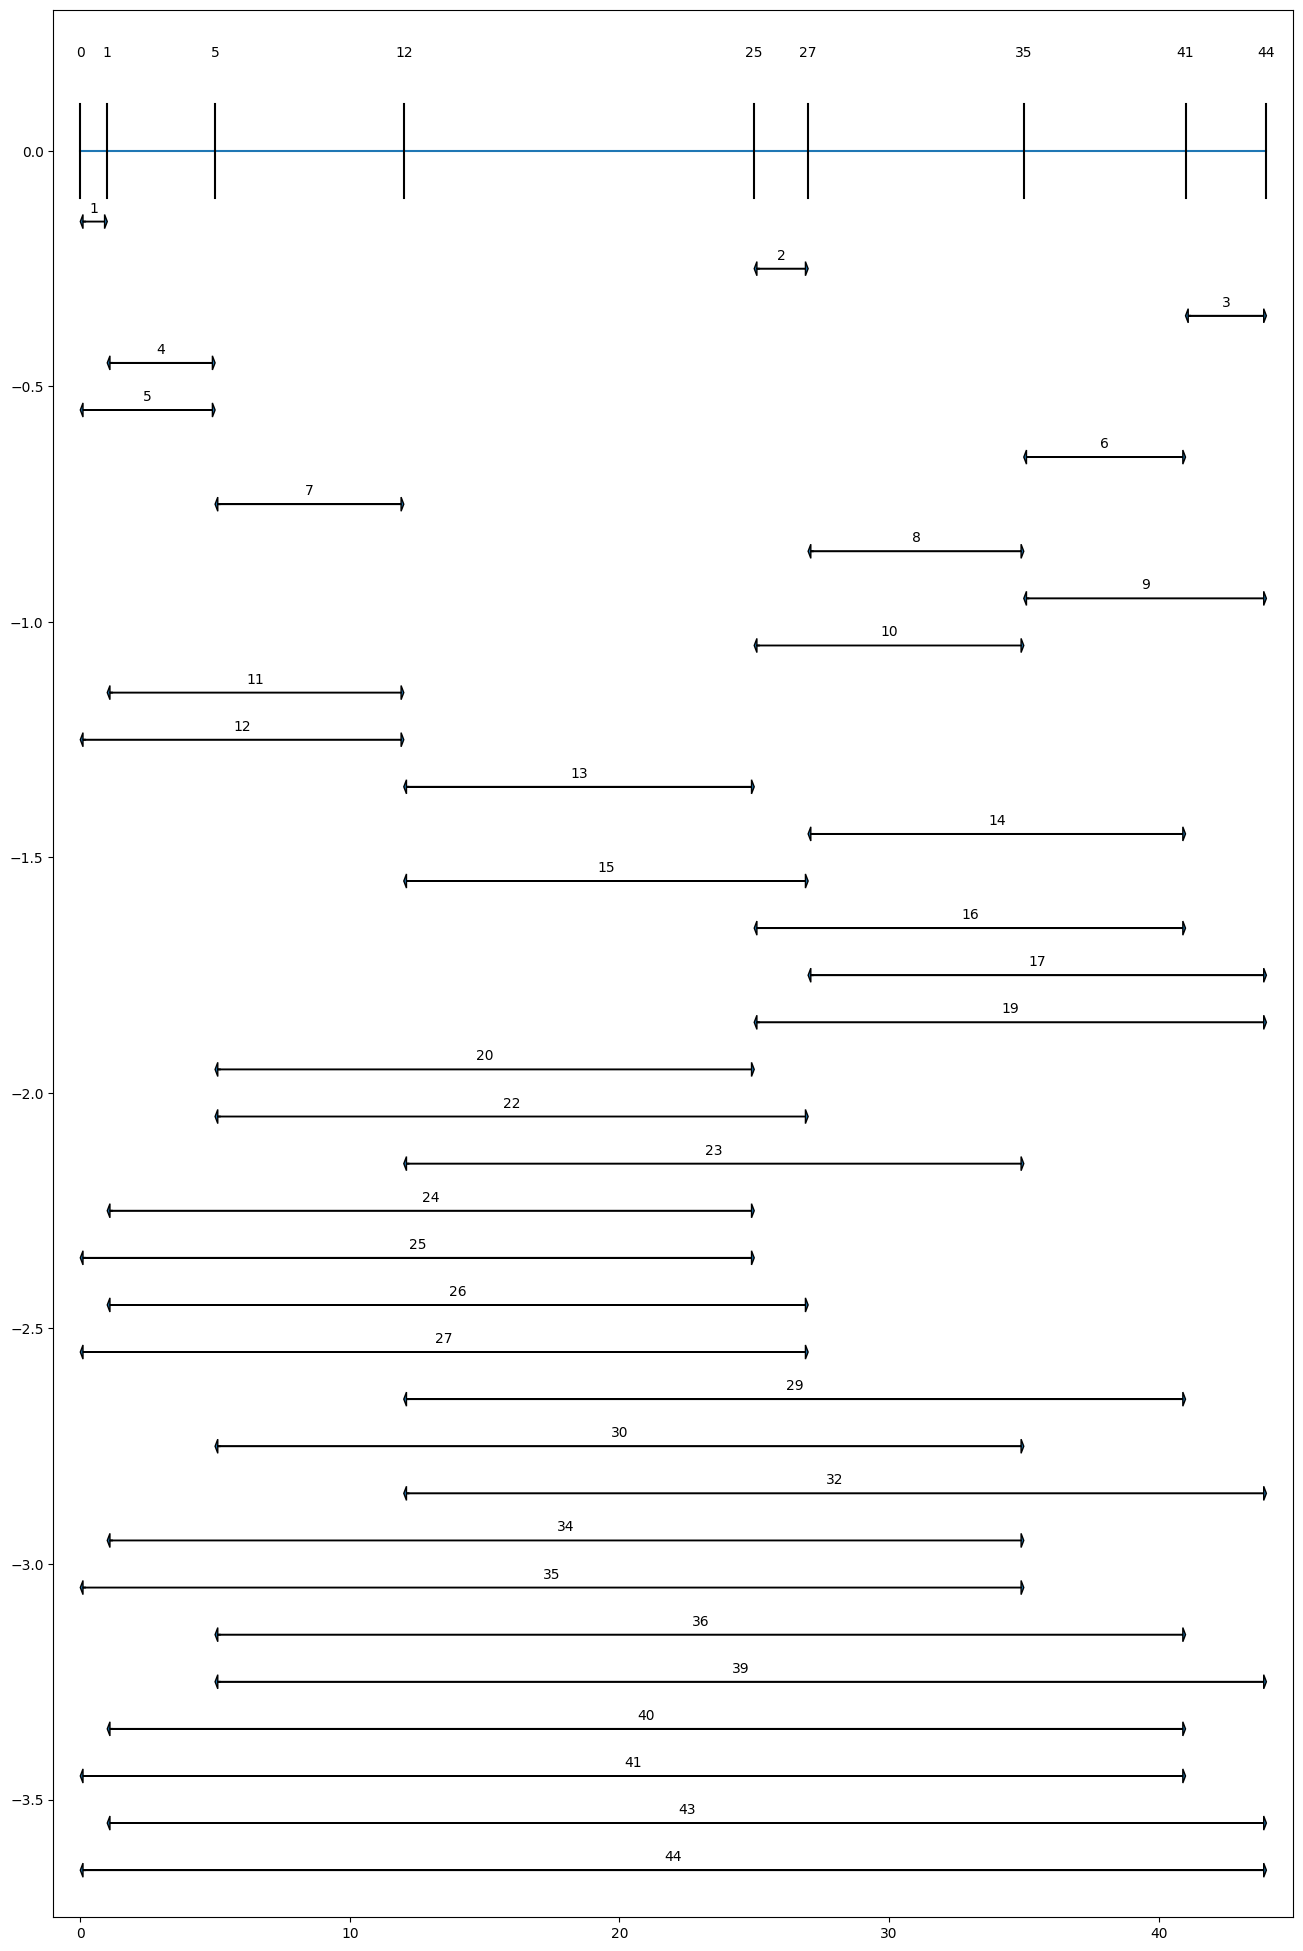

 ! ----------------------------------------------------------------------------
 ! Minimization problem - 11 variables, 12 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 99.0 (before), 99.0 (after)
 !  . Memory usage      : 299.9 kB (before), 299.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed            Branch decision
                        0         11                 -
 + New bound is 0
                     1000          6        F     5 != x_6
                     2000          5             10 != x_7
                     3000          5              5 != x_7
                     4000          5              6 != x_7
                     5000          5        F     7  = x_7
                     6000          5       

                     116k          4             10  = x_6
                     117k          4              2 != x_1
                     118k          4             18 != x_6
                     119k          4        F     3 != x_4
 ! Time = 0.59s, Average fail depth = 5, Memory usage = 643.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     120k          4              8  = x_6
                     121k          4              6 != x_5
                     122k          4             16 != x_5
                     123k          4             23  = x_6
                     124k          4              5 != x_5
                     125k          4             12 != x_5
                     126k          4        F     5  = x_1
                     127k          4             15  = x_5
                     128k          4              7 != x_5
                     129k          4        F     7  = x_3
                     13

 ! Time = 1.17s, Average fail depth = 5, Memory usage = 643.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     240k          4        F     8 != x_4
                     241k          4        F     1  = x_3
                     242k          4        F    20 != x_5
                     243k          4        F     8  = x_4
                     244k          3              2 != x_3
                     245k          4        F     6  = x_4
                     246k          3             13 != x_4
                     247k          4              4 != x_1
                     248k          3             22  = x_6
                     249k          4             25  = x_6
                     250k          4        F     6 != x_4
                     251k          4        F    11  = x_3
                     252k          4             16 != x_5
                     253k          3        F     8  = x_5
                     25

                     361k          3             12 != x_5
                     362k          3              5 != x_5
                     363k          3              8 != x_4
                     364k          3        F     8  = x_5
                     365k          4              2 != x_4
                     366k          4             11  = x_6
                     367k          4        F     6  = x_4
                     368k          3             14 != x_5
                     369k          3              5 != x_3
                     370k          3        F    16  = x_5
                     371k          3              9 != x_5
                     372k          3        F     6  = x_1
                     373k          3        F     1  = x_1
                     374k          4        F     9 != x_1
                     375k          3             12 != x_5
                     376k          3              8 != x_5
                     377k          3             25  = x

                     485k          4              5 != x_5
                     486k          4              6 != x_4
                     487k          4             17  = x_5
                     488k          4              5  = x_6
                     489k          4        F    16 != x_5
                     490k          3        F     3  = x_5
                     491k          4              2 != x_5
                     492k          4              6 != x_5
                     493k          3             23 != x_6
                     494k          4        F     1  = x_4
                     495k          4        F     1  = x_2
                     496k          4        F     1  = x_2
                     497k          4              7 != x_5
                     498k          3        F     6 != x_4
                     499k          4        F    14  = x_5
 ! Time = 2.45s, Average fail depth = 5, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  N

                     609k          4        F     1  = x_4
                     610k          3             21 != x_5
                     611k          3             12 != x_5
                     612k          3        F     7  = x_5
                     613k          3        F     8  = x_5
                     614k          3        F     9  = x_5
                     615k          3        F    18 != x_5
                     616k          3        F    15 != x_4
                     617k          3             10 != x_5
                     618k          3        F     4  = x_4
                     619k          3        F     5  = x_3
 ! Time = 3.04s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     620k          3        F    16  = x_5
                     621k          3        F     9 != x_3
                     622k          3        F     1  = x_1
                     62

                     733k          4             13 != x_5
                     734k          3        F     3  = x_4
                     735k          3        F     3  = x_4
                     736k          4        F     4  = x_4
                     737k          3        F     5  = x_6
                     738k          4              5 != x_5
                     739k          3        F     9 != x_4
 ! Time = 3.63s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     740k          3              2 != x_1
                     741k          3              7 != x_6
                     742k          3        F     2 != x_1
                     743k          4              8 != x_2
                     744k          3        F    16 != x_3
                     745k          3        F     4 != x_3
                     746k          3             16 != x_5
                     74

                     857k          3        F    10  = x_4
                     858k          3        F     7 != x_4
                     859k          3        F     3  = x_2
 ! Time = 4.20s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     860k          3              3 != x_3
                     861k          3        F    11  = x_4
                     862k          3             26 != x_6
                     863k          3              2 != x_2
                     864k          3        F     9 != x_1
                     865k          3             23 != x_5
                     866k          3             28 != x_5
                     867k          3             13 != x_7
                     868k          4              8  = x_6
                     869k          4        F    11  = x_5
                     870k          4              1 != x_5
                     87

 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                     980k          3        F     5 != x_5
                     981k          3              6 != x_5
                     982k          3              5 != x_4
                     983k          3        F     2  = x_2
                     984k          3              2 != x_3
                     985k          3              6 != x_4
                     986k          3             15 != x_5
                     987k          3        F     6  = x_3
                     988k          3             15 != x_4
                     989k          3             21 != x_5
                     990k          3        F     6  = x_3
                     991k          3        F    15  = x_4
                     992k          3        F     8  = x_5
                     993k          3              6 != x_4
                     994k          3        F    15  = x_4
                     995k    

                    1103k          3              8 != x_4
                    1104k          3        F     8  = x_4
                    1105k          3        F    12  = x_4
                    1106k          3        F     7 != x_5
                    1107k          3              6 != x_5
                    1108k          3        F     2 != x_5
                    1109k          3        F     3 != x_3
                    1110k          3        F     2  = x_4
                    1111k          3        F     2  = x_2
                    1112k          3        F    10  = x_4
                    1113k          3        F    18  = x_4
                    1114k          3        F     4 != x_4
                    1115k          3              7 != x_5
                    1116k          4              7 != x_4
                    1117k          3              6 != x_5
                    1118k          3        F    16  = x_5
                    1119k          3              9 != x

                    1227k          3             25  = x_5
                    1228k          3        F     6  = x_4
                    1229k          3              6 != x_5
                    1230k          3             12 != x_5
                    1231k          3             25 != x_5
                    1232k          3        F     4 != x_4
                    1233k          3        F     5  = x_4
                    1234k          3             18 != x_5
                    1235k          3        F    13  = x_5
                    1236k          3             28  = x_6
                    1237k          3        F    15  = x_4
                    1238k          3              5 != x_5
                    1239k          3        F    13  = x_4
 ! Time = 6.01s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    1240k          3              4 != x_4
                    124

                    1351k          3        F    13  = x_4
                    1352k          3             22  = x_5
                    1353k          3             10  = x_6
                    1354k          3        F     5  = x_3
                    1355k          3              3 != x_2
                    1356k          3             18 != x_5
                    1357k          3             22  = x_5
                    1358k          3              9 != x_5
                    1359k          3        F    12  = x_3
 ! Time = 6.57s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    1360k          3        F     4  = x_1
                    1361k          3        F     8  = x_2
                    1362k          3             17 != x_4
                    1363k          3        F    16  = x_4
                    1364k          3              5 != x_1
                    136

                    1475k          3              3 != x_3
                    1476k          3              6 != x_1
                    1477k          3        F     7  = x_4
                    1478k          3              9 != x_4
                    1479k          3              3 != x_3
 ! Time = 7.13s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    1480k          3              6 != x_4
                    1481k          3             11  = x_5
                    1482k          3        F     4  = x_2
                    1483k          3             10 != x_4
                    1484k          3              4 != x_4
                    1485k          3              9 != x_4
                    1486k          3              8 != x_4
                    1487k          3              8  = x_5
                    1488k          3        F     5  = x_3
                    148

                    1599k          3             13 != x_5
 ! Time = 7.75s, Average fail depth = 6, Memory usage = 675.9 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    1600k          3        F     6  = x_4
                    1601k          3             10 != x_5
                    1602k          3        F     7 != x_4
                    1603k          3             14 != x_4
                    1604k          3        F    14  = x_5
                    1605k          3        F     9  = x_3
                    1606k          3             15 != x_5
                    1607k          3              6 != x_5
                    1608k          3        F     9  = x_2
                    1609k          3              4 != x_5
                    1610k          3              2 != x_2
                    1611k          3             12 != x_5
                    1612k          3        F    11  = x_4
                    161

                    1720k          3        F     4  = x_4
                    1721k          3        F     9 != x_4
                    1722k          3        F     2  = x_4
                    1723k          3              4 != x_4
                    1724k          3        F    18  = x_4
                    1725k          3        F    13  = x_3
                    1726k          3             30 != x_6
                    1727k          3        F     2  = x_4
                    1728k          3        F     9  = x_4
                    1729k          3             13 != x_5
                    1730k          3        F    14 != x_4
                    1731k          3        F    14  = x_4
                    1732k          3        F     2  = x_3
                    1733k          3              6 != x_5
                    1734k          3             22 != x_4
                    1735k          3        F     7  = x_3
                    1736k          3        F    23  = x

                    1844k          3        F     5  = x_4
                    1845k          3              5 != x_4
                    1846k          4             12  = x_6
                    1847k          3        F    13 != x_3
                    1848k          3        F     8  = x_3
                    1849k          3        F     5  = x_1
                    1850k          4              8 != x_4
                    1851k          3        F     5  = x_6
                    1852k          3        F     3  = x_3
                    1853k          3             13 != x_5
                    1854k          3        F     6 != x_4
                    1855k          3        F     7 != x_4
                    1856k          4             19 != x_5
                    1857k          3              8 != x_5
                    1858k          3        F     5 != x_2
                    1859k          3        F     6  = x_5
 ! Time = 9.13s, Average fail depth = 6, Memory usage = 

                    1968k          3             10 != x_4
                    1969k          3        F     8  = x_4
                    1970k          3             13 != x_4
                    1971k          3        F    10 != x_4
                    1972k          3             12 != x_4
                    1973k          3        F     7  = x_5
                    1974k          3              7 != x_5
                    1975k          3              6 != x_5
                    1976k          3        F     9  = x_4
                    1977k          3             17 != x_5
                    1978k          3             24  = x_5
                    1979k          3              6 != x_5
 ! Time = 9.78s, Average fail depth = 6, Memory usage = 680.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    1980k          3        F     5  = x_4
                    1981k          3        F     7  = x_4
                    198

                    2092k          4        F    11 != x_5
                    2093k          4        F     4 != x_1
                    2094k          4              3 != x_5
                    2095k          4        F     7  = x_5
                    2096k          4        F     2  = x_4
                    2097k          4             17 != x_6
                    2098k          4              7 != x_4
                    2099k          4              7 != x_4
 ! Time = 10.42s, Average fail depth = 6, Memory usage = 680.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    2100k          4             10  = x_6
                    2101k          4              7 != x_5
                    2102k          4        F    10  = x_3
                    2103k          3        F    10 != x_3
                    2104k          4        F    11  = x_5
                    2105k          3        F    15 != x_2
                    21

                    2216k          3              3 != x_2
                    2217k          3              4  = x_4
                    2218k          3        F     6  = x_5
                    2219k          3              3 != x_4
 ! Time = 11.07s, Average fail depth = 6, Memory usage = 680.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    2220k          3              8 != x_4
                    2221k          3        F     3  = x_4
                    2222k          3              7 != x_5
                    2223k          3              4 != x_5
                    2224k          3             16 != x_5
                    2225k          3        F     3  = x_2
                    2226k          3              7 != x_5
                    2227k          3              6 != x_5
                    2228k          3              6 != x_5
                    2229k          3        F     5  = x_4
                    22

 ! Time = 11.75s, Average fail depth = 6, Memory usage = 680.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    2340k          3        F    15  = x_4
                    2341k          3              8 != x_5
                    2342k          3        F    20  = x_6
                    2343k          3              3 != x_5
                    2344k          3             30  = x_5
                    2345k          3        F     1 != x_2
                    2346k          3        F    14  = x_4
                    2347k          3              4 != x_1
                    2348k          3        F    14  = x_4
                    2349k          3              4 != x_3
                    2350k          3              2 != x_3
                    2351k          3             13  = x_4
                    2352k          2             28 != x_5
                    2353k          3              4  = x_1
                    23

                    2461k          3        F    10  = x_4
                    2462k          3              7 != x_4
                    2463k          3        F     8  = x_4
                    2464k          3              7 != x_5
                    2465k          3        F     8  = x_4
                    2466k          3             28  = x_5
                    2467k          3        F     9  = x_5
                    2468k          3        F    11  = x_4
                    2469k          2              6 != x_5
                    2470k          3             30  = x_6
                    2471k          3        F     7  = x_4
                    2472k          3             14 != x_4
                    2473k          3             14 != x_4
                    2474k          3        F    11  = x_4
                    2475k          3        F     6 != x_1
                    2476k          3        F    10  = x_4
                    2477k          3        F    13  = x

                    2585k          4             15  = x_6
                    2586k          3        F     9  = x_5
                    2587k          4              3 != x_3
                    2588k          3        F     9  = x_5
                    2589k          3              8 != x_4
                    2590k          3        F     4  = x_1
                    2591k          3             13  = x_5
                    2592k          3             16 != x_6
                    2593k          4              6 != x_4
                    2594k          3              5 != x_1
                    2595k          3             11 != x_5
                    2596k          3        F     4  = x_3
                    2597k          3              3 != x_1
                    2598k          3        F    15 != x_4
                    2599k          3             17 != x_5
 ! Time = 13.11s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  

                    2709k          3        F    14  = x_4
                    2710k          3              7 != x_5
                    2711k          3        F     3  = x_4
                    2712k          3        F     2  = x_2
                    2713k          3             16 != x_5
                    2714k          3        F    19  = x_4
                    2715k          3        F     1 != x_3
                    2716k          3             14 != x_5
                    2717k          3        F     2  = x_1
                    2718k          3             12 != x_4
                    2719k          3              1 != x_5
 ! Time = 13.75s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    2720k          4              3 != x_5
                    2721k          3              7 != x_5
                    2722k          3        F    12 != x_3
                    27

                    2833k          3        F     6 != x_4
                    2834k          3              8 != x_5
                    2835k          3        F    12  = x_4
                    2836k          3        F    10  = x_5
                    2837k          3        F    12  = x_2
                    2838k          3        F     1  = x_1
                    2839k          3        F     3 != x_5
 ! Time = 14.37s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    2840k          3              3 != x_4
                    2841k          3        F     2  = x_4
                    2842k          3        F     3  = x_4
                    2843k          3             14  = x_6
                    2844k          3        F     4  = x_1
                    2845k          3        F     3  = x_3
                    2846k          3             15 != x_4
                    28

                    2957k          2              8 != x_4
                    2958k          3        F     4 != x_1
                    2959k          3        F     7  = x_3
 ! Time = 14.93s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    2960k          3              6 != x_3
                    2961k          3        F     7  = x_5
                    2962k          3              6 != x_3
                    2963k          3              5 != x_1
                    2964k          3        F    10 != x_4
                    2965k          3        F     7 != x_3
                    2966k          2              8 != x_5
                    2967k          3              9 != x_5
                    2968k          3        F     3  = x_4
                    2969k          3             14  = x_6
                    2970k          3             15 != x_4
                    29

 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    3080k          3        F    10  = x_4
                    3081k          2        F    15 != x_2
                    3082k          3             17 != x_4
                    3083k          3        F    26  = x_4
                    3084k          3             12  = x_6
                    3085k          4             10  = x_6
                    3086k          4             13 != x_6
                    3087k          4        F     2  = x_5
                    3088k          4              5 != x_5
                    3089k          4              2 != x_1
                    3090k          4        F     3 != x_3
                    3091k          4        F     1  = x_1
                    3092k          4        F     3  = x_2
                    3093k          4              2 != x_5
                    3094k          4        F     9  = x_2
                    3095k    

                    3202k          3        F    16 != x_4
                    3203k          3        F     6 != x_3
                    3204k          3        F     9  = x_3
                    3205k          3             17  = x_6
                    3206k          3              7 != x_5
                    3207k          3        F     7  = x_4
                    3208k          3              1 != x_3
                    3209k          3        F     7  = x_4
                    3210k          3              5 != x_5
                    3211k          3        F    10  = x_5
                    3212k          3        F     8  = x_4
                    3213k          3        F     4  = x_3
                    3214k          3        F     3  = x_4
                    3215k          3        F     3  = x_4
                    3216k          3        F     7  = x_4
                    3217k          3        F     5  = x_4
                    3218k          3        F     4  = x

                    3326k          3              7  = x_6
                    3327k          4              2 != x_2
                    3328k          3        F     4  = x_4
                    3329k          3        F     4  = x_2
                    3330k          3              6 != x_1
                    3331k          3        F     5  = x_4
                    3332k          3             16  = x_5
                    3333k          3             18  = x_6
                    3334k          3              3 != x_3
                    3335k          3        F     5  = x_4
                    3336k          3              3 != x_5
                    3337k          3              6 != x_5
                    3338k          3              7 != x_4
                    3339k          3        F     7  = x_4
 ! Time = 16.66s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    33

                    3450k          3        F     4 != x_5
                    3451k          4             12  = x_5
                    3452k          3        F     3  = x_3
                    3453k          3        F     4  = x_4
                    3454k          3        F     1  = x_2
                    3455k          3        F    10  = x_4
                    3456k          3        F     7  = x_5
                    3457k          3        F     4  = x_4
                    3458k          3             10 != x_5
                    3459k          3              4 != x_3
 ! Time = 17.21s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    3460k          3              6 != x_5
                    3461k          3             17 != x_3
                    3462k          3             10 != x_5
                    3463k          3        F    14  = x_4
                    34

                    3574k          3              5 != x_2
                    3575k          3        F     4  = x_3
                    3576k          3        F     5  = x_2
                    3577k          3        F     8  = x_2
                    3578k          3        F     6 != x_3
                    3579k          3        F    12  = x_4
 ! Time = 17.78s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    3580k          3              2 != x_2
                    3581k          3              8 != x_5
                    3582k          3        F    24 != x_4
                    3583k          3        F     9  = x_4
                    3584k          3        F    15  = x_4
                    3585k          3        F     7 != x_4
                    3586k          3             11 != x_5
                    3587k          3              6  = x_4
                    35

                    3698k          3        F    10  = x_4
                    3699k          2        F    11  = x_3
 ! Time = 18.34s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    3700k          2             14 != x_5
                    3701k          2             15  = x_5
                    3702k          3              8 != x_4
                    3703k          3        F    16  = x_1
                    3704k          3             15 != x_4
                    3705k          2        F     6  = x_4
                    3706k          2             26 != x_4
                    3707k          3             14 != x_4
                    3708k          3             12  = x_7
                    3709k          4              6 != x_4
                    3710k          3        F     6  = x_5
                    3711k          3              9 != x_6
                    37

 !          Best Branches  Non-fixed            Branch decision
                    3820k          3              6 != x_5
                    3821k          3              8 != x_5
                    3822k          3        F     9  = x_4
                    3823k          3              6  = x_6
                    3824k          4        F     4  = x_4
                    3825k          3              4 != x_4
                    3826k          3             22  = x_6
                    3827k          3        F    14  = x_4
                    3828k          3             19  = x_5
                    3829k          3             10  = x_5
                    3830k          4        F     6 != x_4
                    3831k          3              5 != x_5
                    3832k          3        F     2  = x_4
                    3833k          3        F    13  = x_4
                    3834k          3        F    18  = x_5
                    3835k          3             10

                    3943k          3        F    10  = x_2
                    3944k          3        F     3  = x_4
                    3945k          3             20 != x_5
                    3946k          3        F    19  = x_4
                    3947k          3              9 != x_4
                    3948k          3        F     7 != x_3
                    3949k          3              4  = x_4
                    3950k          3             17 != x_5
                    3951k          3              5 != x_4
                    3952k          3              3 != x_1
                    3953k          3        F     4  = x_4
                    3954k          3        F    15  = x_4
                    3955k          3        F     6  = x_4
                    3956k          3        F     6  = x_3
                    3957k          3             13 != x_5
                    3958k          3        F     5  = x_4
                    3959k          3        F     2  = x

                    4067k          3        F    13 != x_4
                    4068k          3        F    16  = x_4
                    4069k          2             10 != x_4
                    4070k          3        F    14  = x_3
                    4071k          3             10  = x_5
                    4072k          3        F     3  = x_3
                    4073k          3              5 != x_4
                    4074k          3             12 != x_5
                    4075k          3        F     3  = x_3
                    4076k          3              6 != x_5
                    4077k          3        F     9  = x_4
                    4078k          3        F     5  = x_4
                    4079k          3        F    14  = x_4
 ! Time = 20.13s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    4080k          3        F    18  = x_4
                    40

                    4191k          3        F     2  = x_3
                    4192k          3             24 != x_5
                    4193k          3              1 != x_1
                    4194k          2        F     3 != x_3
                    4195k          3        F     8  = x_4
                    4196k          2        F     7  = x_1
                    4197k          2        F    15  = x_4
                    4198k          3              3 != x_4
                    4199k          3              3 != x_2
 ! Time = 20.79s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    4200k          3        F     2  = x_4
                    4201k          3        F     2  = x_4
                    4202k          2             16  = x_4
                    4203k          3             24 != x_2
                    4204k          3        F    13  = x_4
                    42

                    4315k          3              2 != x_3
                    4316k          3              2 != x_5
                    4317k          3        F     7  = x_4
                    4318k          3        F     4  = x_4
                    4319k          3        F     6  = x_4
 ! Time = 21.38s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    4320k          3        F     2  = x_4
                    4321k          3        F     9  = x_4
                    4322k          3             19 != x_4
                    4323k          2        F     2 != x_1
                    4324k          2        F     2  = x_3
                    4325k          3        F     1 != x_2
                    4326k          3        F     8  = x_4
                    4327k          3        F     2  = x_2
                    4328k          3        F     1 != x_3
                    43

                    4439k          3        F    10  = x_3
 ! Time = 22.01s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    4440k          3              8 != x_4
                    4441k          3        F     5 != x_3
                    4442k          2              5 != x_3
                    4443k          3              6 != x_4
                    4444k          3             16 != x_4
                    4445k          2        F    15  = x_4
                    4446k          3              8 != x_5
                    4447k          4             11  = x_5
                    4448k          3        F     6  = x_5
                    4449k          3        F     4  = x_4
                    4450k          3        F     4  = x_2
                    4451k          3              8  = x_4
                    4452k          3             11 != x_5
                    44

                    4560k          3        F    14 != x_2
                    4561k          4        F    17  = x_5
                    4562k          3        F     1  = x_1
                    4563k          3             12 != x_5
                    4564k          4             12 != x_5
                    4565k          3        F     9  = x_5
                    4566k          3        F    14  = x_4
                    4567k          4              2 != x_5
                    4568k          3              2 != x_5
                    4569k          3        F     7  = x_4
                    4570k          3             16 != x_5
                    4571k          3              8  = x_6
                    4572k          4        F     1  = x_4
                    4573k          3             11 != x_5
                    4574k          3             13 != x_5
                    4575k          3        F     5  = x_4
                    4576k          3        F    12  = x

                    4684k          3             10 != x_5
                    4685k          3             19 != x_5
                    4686k          3        F     1  = x_4
                    4687k          3        F     1  = x_1
                    4688k          3        F     8  = x_3
                    4689k          3             13 != x_5
                    4690k          3        F     1  = x_1
                    4691k          3        F    16  = x_4
                    4692k          3        F    11  = x_4
                    4693k          3        F    11  = x_4
                    4694k          3              5 != x_4
                    4695k          3        F     1  = x_2
                    4696k          3             12 != x_4
                    4697k          3        F    14 != x_4
                    4698k          3              7 != x_5
                    4699k          3        F     7  = x_3
 ! Time = 23.23s, Average fail depth = 6, Memory usage =

                    4808k          2              2 != x_5
                    4809k          3              9 != x_5
                    4810k          3             10 != x_5
                    4811k          3             10 != x_5
                    4812k          3             14 != x_5
                    4813k          3              3 != x_3
                    4814k          3        F     8  = x_4
                    4815k          3             13 != x_5
                    4816k          3        F    22  = x_4
                    4817k          3             14 != x_5
                    4818k          3        F     1 != x_1
                    4819k          2             16  = x_4
 ! Time = 23.77s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    4820k          2        F     2 != x_2
                    4821k          3        F    18 != x_4
                    48

                    4932k          3        F     4 != x_2
                    4933k          3        F     1  = x_3
                    4934k          3        F     2  = x_3
                    4935k          2              3 != x_4
                    4936k          3        F    14  = x_2
                    4937k          2             10 != x_5
                    4938k          3        F     2  = x_3
                    4939k          3             14 != x_5
 ! Time = 24.37s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    4940k          3             14  = x_5
                    4941k          2        F     1  = x_3
                    4942k          2        F    15  = x_4
                    4943k          3             11 != x_4
                    4944k          3        F     3  = x_4
                    4945k          3              1  = x_1
                    49

                    5056k          3        F     1  = x_2
                    5057k          3        F     2  = x_2
                    5058k          3        F     4 != x_1
                    5059k          3             10  = x_4
 ! Time = 24.97s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    5060k          3              3 != x_1
                    5061k          3             12 != x_5
                    5062k          3              2  = x_1
                    5063k          2             13 != x_4
                    5064k          3             13  = x_4
                    5065k          3        F     1  = x_3
                    5066k          3        F     4  = x_1
                    5067k          3        F     2  = x_1
                    5068k          3        F     5 != x_3
                    5069k          3        F     1  = x_3
                    50

 ! Time = 25.53s, Average fail depth = 6, Memory usage = 712.0 kB
 ! Current bound is 0
 !          Best Branches  Non-fixed            Branch decision
                    5180k          3        F     3  = x_2
                    5181k          3             20  = x_5
                    5182k          2             10  = x_4
                    5183k          3             19 != x_4
                    5184k          3        F     7  = x_2
                    5185k          2             17  = x_5
                    5186k          3        F    13 != x_3
                    5187k          3        F     3  = x_4
                    5188k          4        F     2  = x_4
                    5189k          3        F     6  = x_4
                    5190k          3        F     7  = x_3
                    5191k          3             14  = x_5
                    5192k          3        F    11 != x_4
                    5193k          3              9 != x_5
                    51

                    5301k          3        F     2  = x_4
                    5302k          3        F     8  = x_3
                    5303k          2        F     9  = x_4
                    5304k          3        F     4 != x_3
                    5305k          2              2 != x_2
                    5306k          3        F     4  = x_4
                    5307k          3        F     5  = x_4
                    5308k          3        F     8  = x_4
                    5309k          2        F     6  = x_4
                    5310k          3        F    21  = x_5
                    5311k          3        F     4  = x_4
                    5312k          2              1 != x_3
                    5313k          2              5 != x_1
                    5314k          3             32  = x_6
                    5315k          3             13 != x_5
                    5316k          2        F     1  = x_4
                    5317k          3        F     8  = x

 ! Search completed, 1 solution found.
 ! Best objective         : 55 (optimal - effective tol. is 0)
 ! Best bound             : 0
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 5422834
 ! Number of fails        : 2711417
 ! Total memory usage     : 757.3 kB (716.9 kB CP Optimizer + 40.5 kB Concert)
 ! Time spent in solve    : 26.69s (26.69s engine + 0.00s extraction)
 ! Search speed (br. / s) : 203102.4
 ! ----------------------------------------------------------------------------


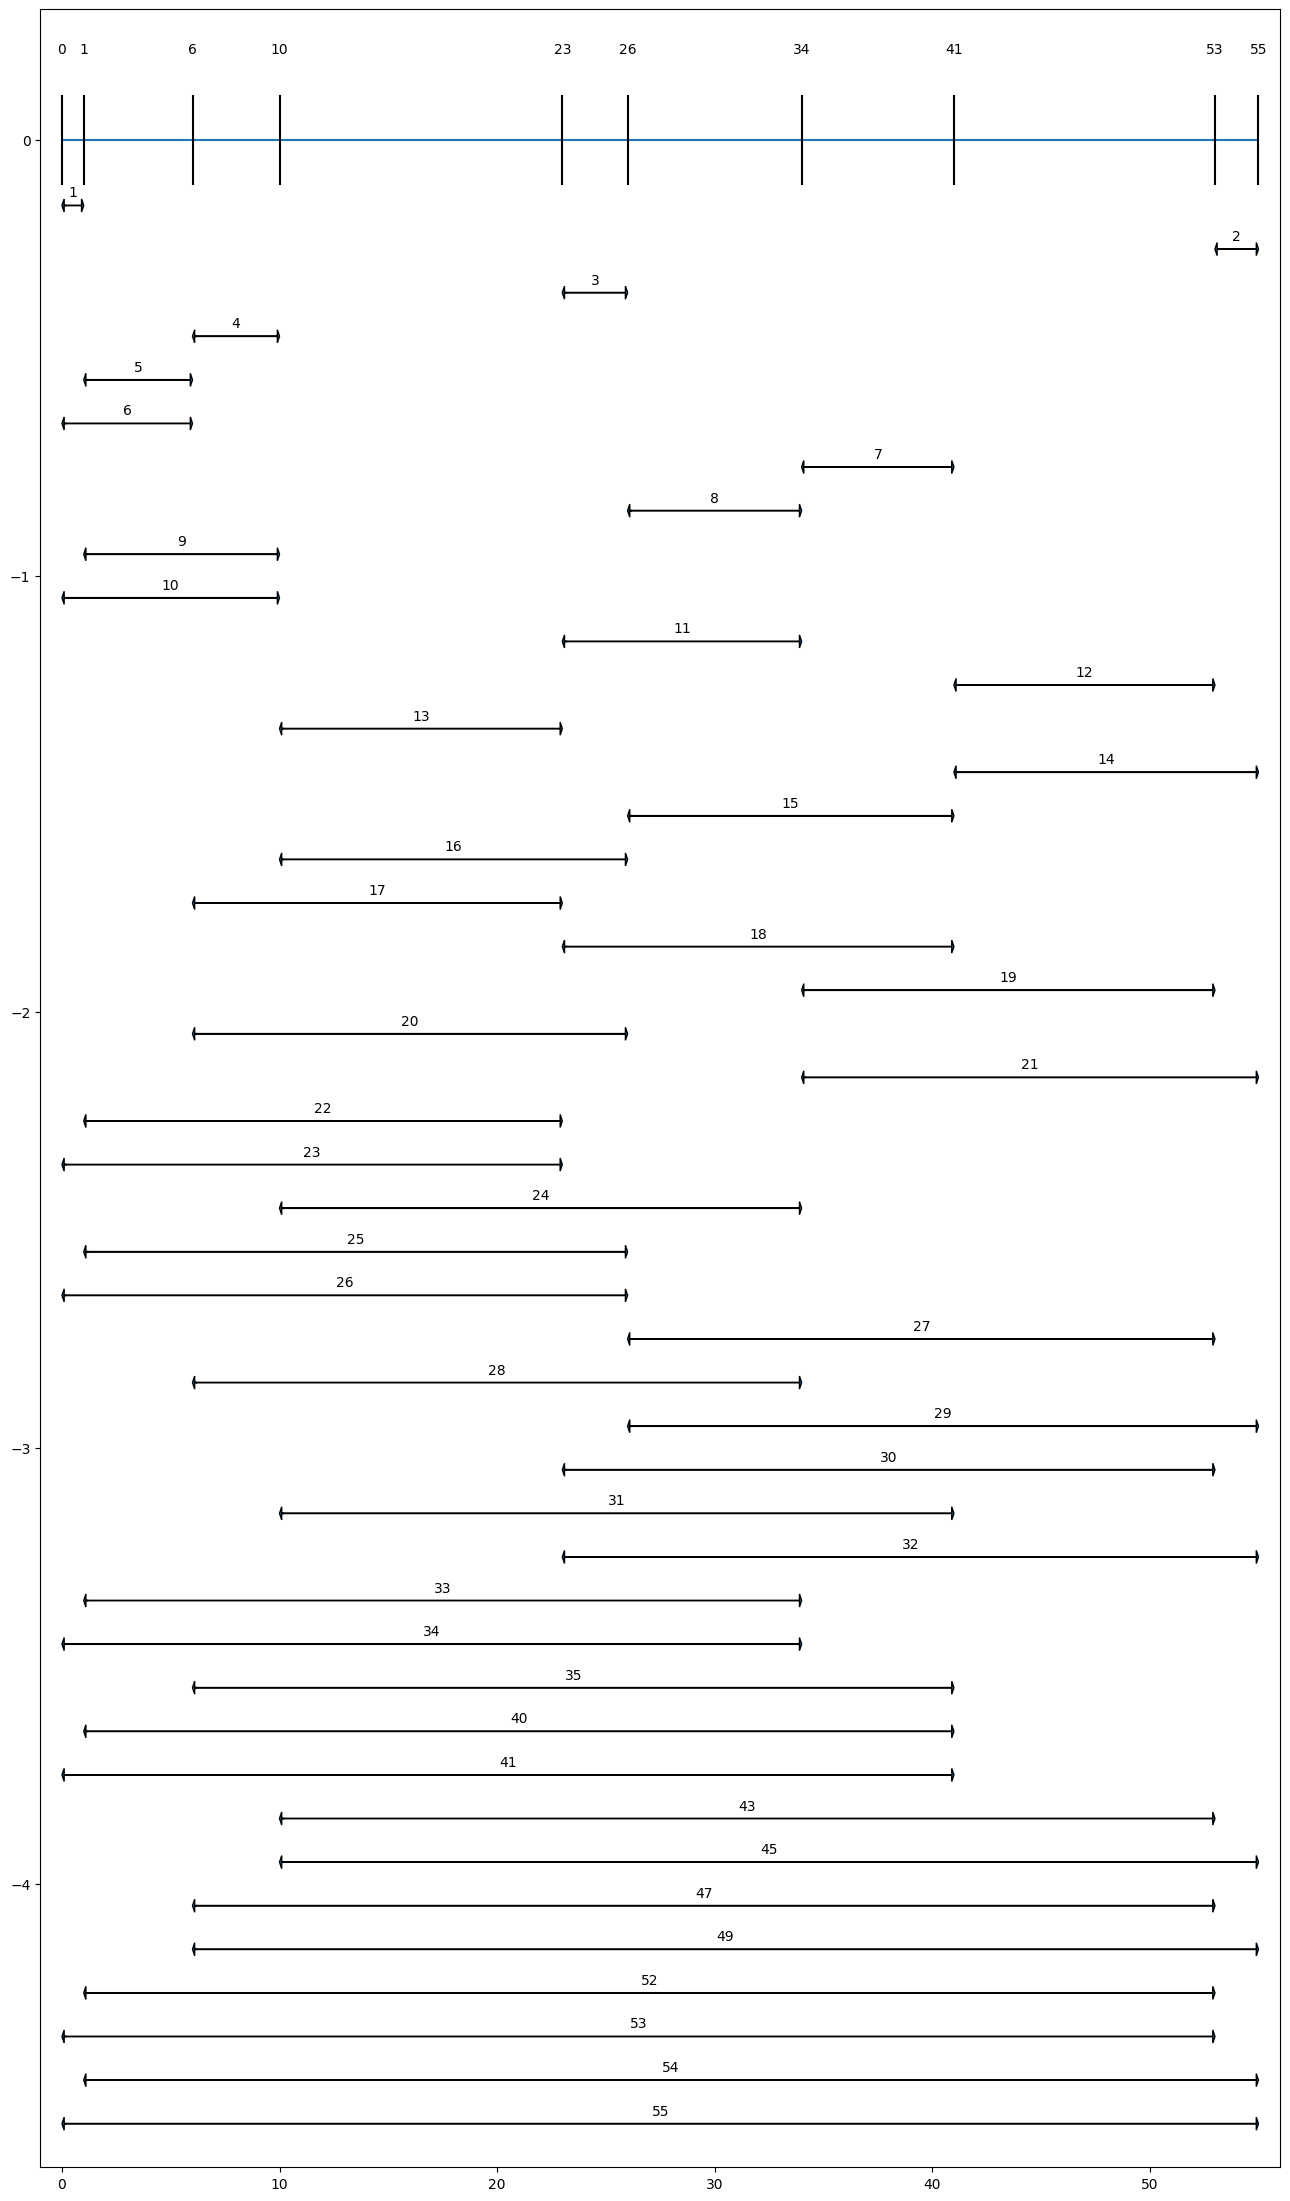

In [61]:
for n in range(6,11):
    model=basic_optimisation_model(n)
    solved_m = model.solve()
    values = [solved_m.get_value(f'x_{i}') for i in range(n)]
    display_golomb(values)

In [74]:
model=basic_optimisation_model(4)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(4)]
    print((values))

[0, 1, 3, 7]
[0, 1, 4, 6]


# Symmetry Breaking

In combinatorial optimisation, two (partial) solutions are called symmetric if we can find a transformation from one to the other. 
Consider our golomb ruler problem. Given any solution to the marks variables, if the first mark is not at index $0$, we can always shift everything to the left to start from $0$ and still have a solution. 

Constraint programming is extremely flexible to handle symmetries since they can be declared as constraints. 

In the case of the above symmetry, we can simply add 
```
model.add (marks[0]==0)
```

This problem has another symmetry, can you find it? In order to help you, display the solution for n=4 and m=6 for the decision problem. You should find 2 solutions that are essentially the same. Can you find the symmetry? How can we model this symmetry as a constraint? 

In [67]:
model = decision_model(4,6)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(4)]
    print((values))
#on obtient la solution [0,1,4,6]
#la symmétrie serait [0,2,5,6]

8
[0, 1, 4, 6]
[0, 2, 5, 6]


Write a new function nosymmetry_optimisation_model(n) that builds a new model that avoids the two symmetries we found so far. 

In [97]:
def nosymmetry_optimisation_model(n):
    
    model = CpoModel(name='golomb_ruler')
    x= model.integer_var_list(n, 0, 2**(n-1), 'x')
    
    model.add(x[0]==0)
    
    var = []
    
    for i in range(n):
        if i!=(n-1) :
            model.add(x[i]<=x[i+1])
        for j in range(i+1,n):
            var.append(x[j]-x[i])
            
    model.add((x[1]-x[0])<=(x[-1]-x[-2]))
    model.add(all_diff(var))
    model.add(model.minimize(x[-1]))
    return model

In [77]:
def nosymmetry_optimisation_model_test(n,m):
    
    model = CpoModel(name='golomb_ruler')
    x= model.integer_var_list(n, 0, m, 'x')
    
    model.add(x[0]==0)
    model.add(x[-1]==m)
    
    var = []
    
    for i in range(n):
        if i!=(n-1) :
            model.add(x[i]<=x[i+1])
        for j in range(i+1,n):
            var.append(x[j]-x[i])
    model.add((x[1]-x[0])<=(x[-1]-x[-2]))        
    model.add(all_diff(var))
    print(2**(n-1))
    return model

Compare nosymmetry_optimisation_model and basic_optimisation_model for different values of $n$ (you decide the values of $n$). Plot the runtime and the search tree size

In [73]:
model = nosymmetry_optimisation_model(4)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(4)]
    print((values))

[0, 1, 3, 7]
[0, 1, 4, 6]


In [79]:
model = basic_optimisation_model(4)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(4)]
    print((values))
    
model = decision_model(4,6)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(4)]
    print((values))
    
model=nosymmetry_optimisation_model_test(4,6)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(4)]
    print((values))

[0, 1, 3, 7]
[0, 1, 4, 6]
8
[0, 1, 4, 6]
[0, 2, 5, 6]
8
[0, 1, 4, 6]


In [80]:
def run(model,params) :
    sol = model.solve(TimeLimit= params.TimeLimit , LogVerbosity = params.LogVerbosity, LogPeriod=params.LogPeriod, trace_log=params.trace_log )
    return [sol.get_solver_infos()['NumberOfChoicePoints'], sol.get_solver_infos()['TotalTime'], sol.get_solver_infos()['SearchStatus']]

 basic_optimisation_model:  [10, 0, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [11, 0.01, 'SearchCompleted']
 basic_optimisation_model:  [69, 0, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [42, 0, 'SearchCompleted']
 basic_optimisation_model:  [616, 0, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [411, 0.01, 'SearchCompleted']
 basic_optimisation_model:  [5501, 0.04, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [3328, 0.03, 'SearchCompleted']
 basic_optimisation_model:  [40713, 0.38, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [26670, 0.23, 'SearchCompleted']
 basic_optimisation_model:  [309891, 3.08, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [204032, 1.95, 'SearchCompleted']
 basic_optimisation_model:  [1323606, 15, 'SearchStopped']
 nosymmetry_optimisation_model_test:  [1317033, 15, 'SearchStopped']
 basic_optimisation_model:  [1132594, 15, 'SearchStopped']
 nosymmetry_optimisation_model_test:  [1193555, 1

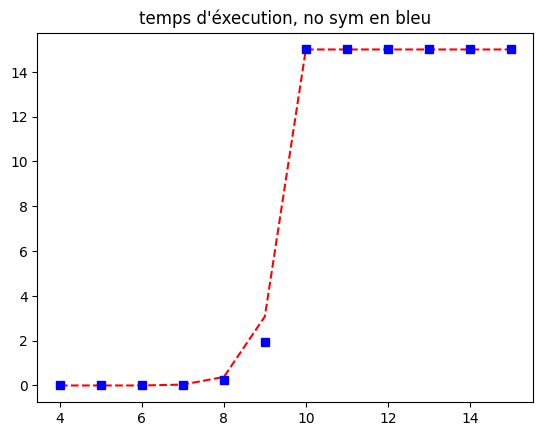

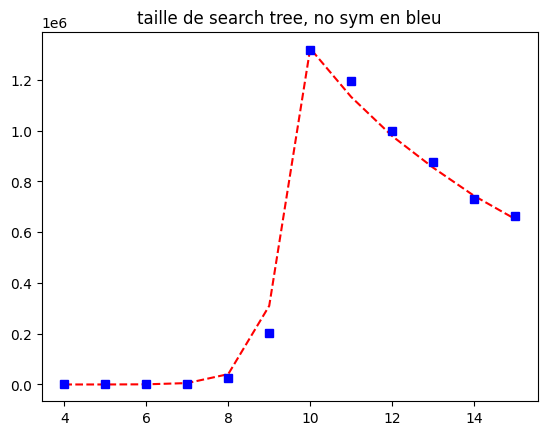

In [85]:
from docplex.cp.parameters import CpoParameters

params = CpoParameters(TimeLimit=15, LogVerbosity='Quiet', LogPeriod=100000, trace_log = False)

t1=[]
s1=[]
t2=[]
s2=[]
for n in range(4,16):
    sol1=run(basic_optimisation_model(n),params)
    print(" basic_optimisation_model: " , sol1)
    sol2=run(nosymmetry_optimisation_model(n),params)
    print(" nosymmetry_optimisation_model_test: " , sol2)
    t1.append(sol1[1])
    s1.append(sol1[0])
    t2.append(sol2[1])
    s2.append(sol2[0])
    
import matplotlib.pyplot as plt
# red dashes, blue squares and green triangles
x = list(range(4,16))
print(x)
plt.title("temps d'éxecution, no sym en bleu")
plt.plot(x, t1, 'r--', x, t2, 'bs')
plt.show()
plt.title("taille de search tree, no sym en bleu")
plt.plot(x, s1, 'r--', x, s2, 'bs')
plt.show()


 basic_optimisation_model:  [309891, 3.13, 'SearchCompleted']
 nosymmetry_optimisation_model_test:  [92830, 1.1, 'SearchCompleted']
 basic_optimisation_model:  [1248857, 15, 'SearchStopped']
 nosymmetry_optimisation_model_test:  [760080, 9.85, 'SearchCompleted']
[9]


ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

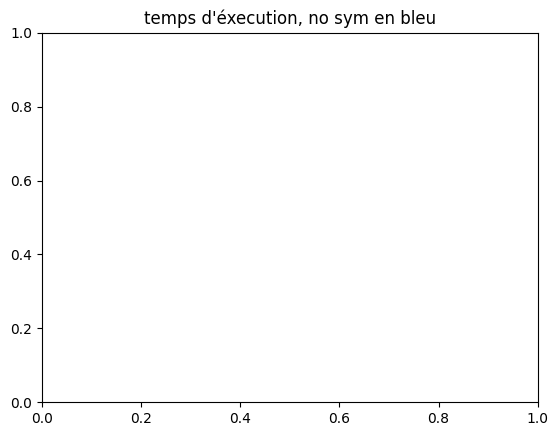

In [88]:
from docplex.cp.parameters import CpoParameters

params = CpoParameters(TimeLimit=15, LogVerbosity='Quiet', LogPeriod=100000, trace_log = False)

t1=[]
s1=[]
t2=[]
s2=[]
for n in range(9,11):
    sol1=run(basic_optimisation_model(n),params)
    print(" basic_optimisation_model: " , sol1)
    sol2=run(nosymmetry_optimisation_model(n),params)
    print(" nosymmetry_optimisation_model_test: " , sol2)
    t1.append(sol1[1])
    s1.append(sol1[0])
    t2.append(sol2[1])
    s2.append(sol2[0])
    
import matplotlib.pyplot as plt
# red dashes, blue squares and green triangles
x = list(range(9,10))
print(x)
plt.title("temps d'éxecution, no sym en bleu")
plt.plot(x, t1, 'r--', x, t2, 'bs')
plt.show()
plt.title("taille de search tree, no sym en bleu")
plt.plot(x, s1, 'r--', x, s2, 'bs')
plt.show()

What's your impression about symmetries? 

## Implied Constraints

An implied constraint is one that can be dedused by looking at the original constraints of the problem. 

For instance, if we have $a<b $ and $b<c$, one can infer that $a<c$. 

Such constraints (called also redundant constraints) can help the solver to prune further the search tree. 



In our problem there is an implied constraint. Can you find it? Please check with of the supervisors. 



Write a new function nosymmetry2_optimisation_model(n) that adds the implied constraint to the nosymmetry_optimisation_model(n) and returns the new model 

In [99]:
def nosymmetry2_optimisation_model(n):
    
    model = CpoModel(name='golomb_ruler')
    x= model.integer_var_list(n, 0, 2**(n-1), 'x')
    
    model.add(x[0]==0)
    
    var = []
    
    for i in range(n):
        if i!=(n-1) :
            model.add(x[i]<=x[i+1])
        for j in range(i+1,n):
            var.append(x[j]-x[i])
    
    model.add(x[-1]<=(2*x[-2]+1))
    model.add((x[1]-x[0])<=(x[-1]-x[-2]))
    model.add(all_diff(var))
    model.add(model.minimize(x[-1]))
    return model

In [100]:
model=nosymmetry2_optimisation_model(9)
solved_m = model.start_search(trace_log=False)
for s in solved_m :
    values = [s.get_value(f'x_{i}') for i in range(9)]
    print((values))

[0, 1, 4, 9, 15, 22, 32, 34, 58]
[0, 1, 12, 20, 26, 30, 33, 35, 57]
[0, 1, 3, 14, 20, 24, 29, 36, 54]
[0, 1, 4, 10, 21, 29, 34, 36, 52]
[0, 1, 3, 8, 17, 28, 32, 38, 50]
[0, 1, 5, 7, 19, 29, 32, 40, 49]
[0, 1, 4, 10, 21, 33, 35, 40, 48]
[0, 1, 4, 13, 24, 30, 38, 40, 45]
[0, 1, 5, 12, 25, 27, 35, 41, 44]


 nosymmetry_optimisation_model:  [11, 0, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [10, 0, 'SearchCompleted']
 nosymmetry_optimisation_model:  [36, 0, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [34, 0, 'SearchCompleted']
 nosymmetry_optimisation_model:  [180, 0, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [176, 0, 'SearchCompleted']
 nosymmetry_optimisation_model:  [1378, 0.01, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [1375, 0.02, 'SearchCompleted']
 nosymmetry_optimisation_model:  [11831, 0.12, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [11824, 0.13, 'SearchCompleted']
 nosymmetry_optimisation_model:  [92830, 1.1, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [92826, 1.09, 'SearchCompleted']
 nosymmetry_optimisation_model:  [760080, 9.83, 'SearchCompleted']
 nosymmetry2_optimisation_model:  [760076, 9.81, 'SearchCompleted']
 nosymmetry_optimisation_model:  [1070307, 15, 'SearchStopped']
 nosymmetry2_optimisation_model:  [11038

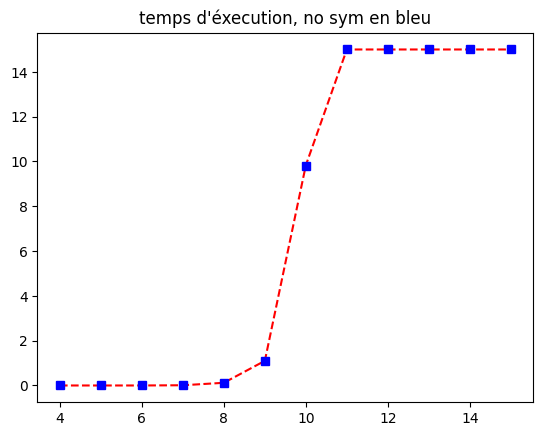

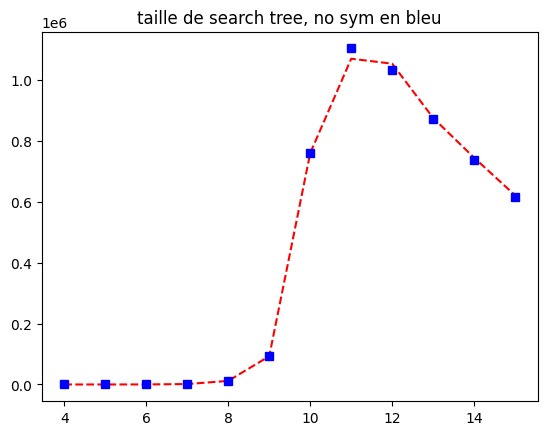

In [101]:
from docplex.cp.parameters import CpoParameters

params = CpoParameters(TimeLimit=15, LogVerbosity='Quiet', LogPeriod=100000, trace_log = False)

t1=[]
s1=[]
t2=[]
s2=[]
for n in range(4,16):
    sol1=run(nosymmetry_optimisation_model(n),params)
    print(" nosymmetry_optimisation_model: " , sol1)
    sol2=run(nosymmetry2_optimisation_model(n),params)
    print(" nosymmetry2_optimisation_model: " , sol2)
    t1.append(sol1[1])
    s1.append(sol1[0])
    t2.append(sol2[1])
    s2.append(sol2[0])
    
import matplotlib.pyplot as plt
# red dashes, blue squares and green triangles
x = list(range(4,16))
print(x)
plt.title("temps d'éxecution, no sym en bleu")
plt.plot(x, t1, 'r--', x, t2, 'bs')
plt.show()
plt.title("taille de search tree, no sym en bleu")
plt.plot(x, s1, 'r--', x, s2, 'bs')
plt.show()


Compare nosymmetry2_optimisation_model and nosymmetry_optimisation_model 

# Randomisation and Restarts

Declare two search strategies: One that uses a lexicographical order on both variables and values, 
    and the other using an impact-based choice on the variables with a random value selection.     

Run the two strategies using the nosymmetry2_optimisation_model for different values of $n$

In [ ]:
#strat min domain 
def run1(model,params) :
    sol = model.solve(SearchType= 'DepthFirst', TimeLimit= params.TimeLimit , LogVerbosity = params.LogVerbosity, LogPeriod=params.LogPeriod, trace_log=params.trace_log )
    return [sol.get_solver_infos()['NumberOfChoicePoints'], sol.get_solver_infos()['TotalTime'], sol.get_solver_infos()['SearchStatus']]

#strat random

#strat random 
def run2(model,params) :
    sol = model.solve(SearchType= 'DepthFirst', TimeLimit= params.TimeLimit , LogVerbosity = params.LogVerbosity, LogPeriod=params.LogPeriod, trace_log=params.trace_log )
    return [sol.get_solver_infos()['NumberOfChoicePoints'], sol.get_solver_infos()['TotalTime'], sol.get_solver_infos()['SearchStatus']]

from docplex.cp.parameters import CpoParameters

params = CpoParameters(TimeLimit=15, LogVerbosity='Quiet', LogPeriod=100000, trace_log = False)

t1=[]
s1=[]
t2=[]
s2=[]
for n in range(4,16):
    sol1=run(nosymmetry2_optimisation_model(n),params)
    print(" nosymmetry_optimisation_model strat1: " , sol1)
    sol2=run(nosymmetry2_optimisation_model(n),params)
    print(" nosymmetry2_optimisation_model strat2: " , sol2)
    t1.append(sol1[1])
    s1.append(sol1[0])
    t2.append(sol2[1])
    s2.append(sol2[0])
    
import matplotlib.pyplot as plt
# red dashes, blue squares and green triangles
x = list(range(4,16))
print(x)
plt.title("temps d'éxecution, strat2 en bleu")
plt.plot(x, t1, 'r--', x, t2, 'bs')
plt.show()
plt.title("taille de search tree, strat2 en bleu")
plt.plot(x, s1, 'r--', x, s2, 'bs')
plt.show()


### The magic of restarts


Combinatorial search exhibits usually a bad behaviour in the runtime distribution called **heavy tailed phenomenon**. 
That is, at any node of the search tree, there is a non-negligeable probability that the time needed to explore the current subtree is heavier than 
an exponential distribution (you can read about it here https://aaai.org/Papers/AAAI/1998/AAAI98-061.pdf. 


A simple solution to deal with such a bad behaviour is to restart search from time to time. 
CPOptimizer offers this choice by using the parameter: 
    
```
    SearchType= 'Restart'
```



Using a restart search, evaluate the two strategies mentionned above using the nosymmetry2_optimisation_model for different values of $n$. What do you think?  

What is the maximum value of $n$ for which you can solve this problem? Use all your techniques! 

In [ ]:
### WARNING : This block takes a lot of time to execute
# A lot of configurations try for instance 


What did you learn today? 